<table style="width:100%" border="0">
    <col width="20%">
    <col width="60%">
    <col width="20%">
    <tr></tr>
    <tr>
        <th style="text-align:left"><img src="Images/UNAM_logo.jpg" width="150px"></th>
        <th style="text-align:center"><span style="font-size:220%">Física Computacional</span><br/><br/><span style="font-size:150%">Tarea 17</span></th> 
        <th style="text-align:right"><img src="Images/LogoCiencias.jpg" width="170px"></th>
    </tr>
</table>

In [1]:
using PyPlot;

# Álgebra Lineal

## Ejercicio 1

Si $\:f$ es una función que tiene definida su serie de Taylor, $\:f(x)=\displaystyle\sum_{n=0}^{\infty}\frac{f^{(n)}(0)}{n!}x^{n}$, entonces dada una matriz cuadrada $\boldsymbol{\mathcal{A}}$ se define la matriz $\:f(\boldsymbol{\mathcal{A}})$ por

$$f(\boldsymbol{\mathcal{A}})=\sum_{n=0}^{\infty}\frac{f^{(n)}(0)}{n!}\boldsymbol{\mathcal{A}}^{n}$$

## Ejercicio 2

Una matriz cuadrada $\boldsymbol{\mathcal{A}}$ es simétrica si $\boldsymbol{\mathcal{A}}=\boldsymbol{\mathcal{A}}^{T}$, es decir que coincide con su transpuesta.

## Ejercicio 3

Si $\boldsymbol{\mathcal{A}}$ es una matriz cuadrada cualquiera, entonces

$$\boldsymbol{\mathcal{A}}+\boldsymbol{\mathcal{A}}^{T}$$

De hecho, $\boldsymbol{\mathcal{A}}=\dfrac{1}{2}\left(\boldsymbol{\mathcal{A}}+\boldsymbol{\mathcal{A}}^{T}\right)+\dfrac{1}{2}\left(\boldsymbol{\mathcal{A}}-\boldsymbol{\mathcal{A}}^{T}\right)$, donde el primer término en paréntesis es una matriz simétrica y el segundo término entre paréntesis una matriz antisimétrica.

## Ejercicio 4

Para calcular el propagador necesitamos diagonalizar la matriz

$$\boldsymbol{\mathcal{A}}=\left(\begin{array}{cc}-1 & 1\\-1 & -1\end{array}\right),$$

su polinomio característico es $\lambda^{2}+2\lambda+2$, así que $\lambda_{1}=-1+i$ y $\lambda_{2}=-1-i$, así que los vectores propios $\mathbf{v}_{1}$ y $\mathbf{v}_{2}$ cumplen

$$\boldsymbol{\mathcal{A}}-\lambda_{1}\boldsymbol{\mathcal{I}}=\left(\begin{array}{cc}-i & 1\\-1 & -i\end{array}\right)\left(\begin{array}{c}a\\b\end{array}\right)=0\Longrightarrow b-ia=0\Longrightarrow\mathbf{v}_{1}=\frac{1}{\sqrt{2}}\left(\begin{array}{c}1\\i\end{array}\right)$$

$$\boldsymbol{\mathcal{A}}-\lambda_{2}\boldsymbol{\mathcal{I}}=\left(\begin{array}{cc}i & 1\\-1 & i\end{array}\right)\left(\begin{array}{c}c\\d\end{array}\right)=0\Longrightarrow d+ic=0\Longrightarrow\mathbf{v}_{2}=\frac{1}{\sqrt{2}}\left(\begin{array}{c}1\\-i\end{array}\right)$$

Por lo que si definimos

$$\boldsymbol{\mathcal{w}}=\frac{1}{\sqrt{2}}\left(\begin{array}{cc}1 & 1\\i & -i\end{array}\right),\:\:\boldsymbol{\mathcal{D}}=\left(\begin{array}{cc}-1+i & 0\\0 & -1-i\end{array}\right),$$

entonces

$$\boldsymbol{\mathcal{A}}=\boldsymbol{\mathcal{w}}\boldsymbol{\mathcal{D}}\boldsymbol{\mathcal{w}}^{-1}$$

In [2]:
A = [-1 1;-1 -1];
w = (1/sqrt(2))*[1 1;im -im];
D = [-1+im 0;0 -1-im];

Podemos corroborar los eigenvalores

In [3]:
eigvals(A)

2-element Array{Complex{Float64},1}:
 -1.0+1.0im
 -1.0-1.0im

También los eigenvectores

In [4]:
sqrt(2)*eigvecs(A)

2×2 Array{Complex{Float64},2}:
 1.0+0.0im  1.0-0.0im
 0.0+1.0im  0.0-1.0im

Y observemos que en efecto $\boldsymbol{\mathcal{A}}=\boldsymbol{\mathcal{w}}\boldsymbol{\mathcal{D}}\boldsymbol{\mathcal{w}}^{-1}$

In [5]:
w*D*w'

2×2 Array{Complex{Float64},2}:
 -1.0+0.0im   1.0+0.0im
 -1.0+0.0im  -1.0+0.0im

El propagador es entonces $e^{\boldsymbol{\mathcal{A}}t}=\boldsymbol{\mathcal{w}}e^{\boldsymbol{\mathcal{D}}t}\boldsymbol{\mathcal{w}}^{-1}$, donde al ser diagonal $\boldsymbol{\mathcal{D}}$ se tiene que $e^{\boldsymbol{\mathcal{D}}t}$ es la matriz diagonal cuyas entradas son la exponencial de las entradas de $\boldsymbol{\mathcal{D}}$.

$$e^{\boldsymbol{\mathcal{A}}t}=\frac{e^{-t}}{2}\left(\begin{array}{cc}1 & 1\\i & -i\end{array}\right)\left(\begin{array}{cc}\cos(t)+i\:\mathrm{sen}(t) & 0\\0 & \cos(t)-i\:\mathrm{sen}(t)\end{array}\right)\left(\begin{array}{cc}1 & -i\\1 & i\end{array}\right)=\frac{e^{-t}}{2}\left(\begin{array}{cc}1 & 1\\i & -i\end{array}\right)\left(\begin{array}{cc}\cos(t)+i\:\mathrm{sen}(t) & \mathrm{sen}(t)-i\cos(t)\\\cos(t)-i\:\mathrm{sen}(t) & \mathrm{sen}(t)+i\cos(t)\end{array}\right)$$

$$e^{\boldsymbol{\mathcal{A}}t}=e^{-t}\left(\begin{array}{cc}\cos(t) & \mathrm{sen}(t)\\-\mathrm{sen}(t) & \cos(t)\end{array}\right)$$

In [6]:
expA(t) = e^(-t)*[cos(t) sin(t);-sin(t) cos(t)];

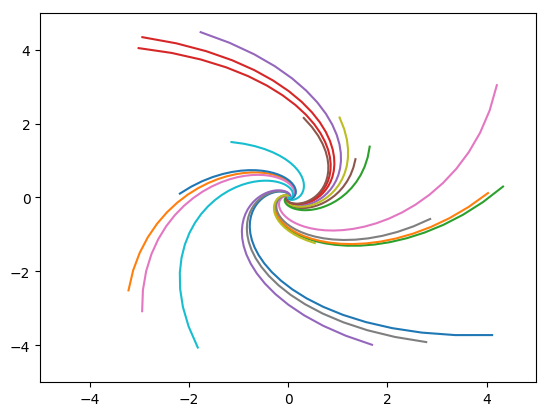

In [7]:
listt=0:0.1:20
for j in 1:20
    a=5*(2*rand(1)-1)
    b=5*(2*rand(1)-1)
    x(t)=expA(t)*[a,b]
    x1=map(x->x[1],x.(listt))
    x2=map(x->x[2],x.(listt))
    plot(x1,x2)
    xlim([-5,5])
    ylim([-5,5]);
end

<div align="right" style="text-indent:0.5cm">**Alonso Torres Edgar Giovanni**</div>